In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [70]:
df1=pd.read_csv("C:/Users/zribi/GO MY CODE/data.csv")

In [71]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,S,Mrs,1


In [72]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [74]:
df1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000


# logistic regression

In [75]:
x = df1[['PassengerId', 'Pclass','Sex','Age','SibSp',"Parch",'Fare','FamilySize']]
y = df1['Survived']



In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  



In [77]:
logreg = LogisticRegression()   


In [78]:
logreg.fit(x_train, y_train)  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
y_pred  = logreg.predict(x_test)    


In [80]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.85


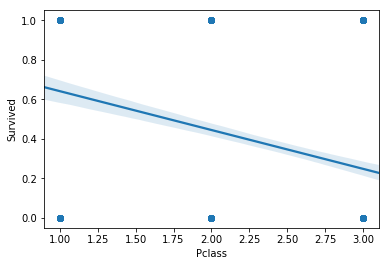

In [81]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=df1)

In [82]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# confusion matrix

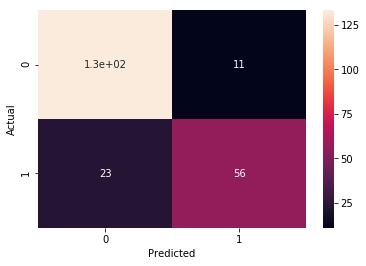

In [83]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       144
           1       0.84      0.71      0.77        79

   micro avg       0.85      0.85      0.85       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



# ROC / AUC

In [86]:

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)


In [87]:
# split into train/test sets
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, random_state=2)


In [88]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]


In [89]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
# predict probabilities
lr_probs = model.predict_proba(testx)


In [91]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


In [92]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)


In [93]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


In [94]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)


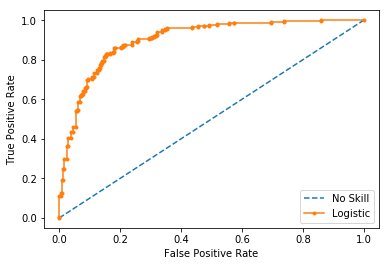

In [98]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
